In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("..\data\complaints_sample.csv", dtype = str, low_memory = False)

In [2]:
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)

Dataset Shape: (36359, 18)
Column Names: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,20-01-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I just applied for a credit card and was shock...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,18944,NaN,Consent provided,Web,20-01-2025,Closed with explanation,Yes,NaN,11682363
1,09-03-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Problem with product or service terms changing,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",KY,40601,NaN,NaN,Web,09-03-2025,In progress,Yes,NaN,12386690
2,19-03-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,NaN,NaN,"EQUIFAX, INC.",NY,11422,NaN,NaN,Web,19-03-2025,In progress,Yes,NaN,12551258
3,20-01-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Problem with product or service terms changing,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,10005,Servicemember,Consent not provided,Web,20-01-2025,Closed with explanation,Yes,NaN,11680498
4,19-01-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Billing dispute for services,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NJ,7740,NaN,Consent not provided,Web,19-01-2025,Closed with monetary relief,Yes,NaN,11624479


Performing EDA and Preprocessing

In [4]:
df_copy = df.copy()

In [5]:
# Checking for missing values
missing_values = df_copy.isnull().sum()

print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Sub-product                        62
Sub-issue                       30920
Consumer complaint narrative    23347
Company public response         32504
State                             230
ZIP code                            4
Tags                            33876
Consumer consent provided?      19239
Consumer disputed?              36282
dtype: int64


In [6]:
# Dropping the columns and filling the missing values
df_copy = df_copy.drop(
    columns = ["Sub-issue", "Consumer complaint narrative", "Company public response",
               "ZIP code", "Tags", "Consumer consent provided?", "Consumer disputed?"])

# Filling missing values in 'Sub-product' and 'State'
df_copy["Sub-product"] = df_copy["Sub-product"].fillna("Unknown")
df_copy["State"] = df_copy["State"].fillna("Unknown")

print("Missing Values After Cleaning:\n", df_copy.isnull().sum())

Missing Values After Cleaning:
 Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Complaint ID                    0
dtype: int64


In [7]:
print("Dataset Shape:", df_copy.shape)
print("\nColumn Info:\n")
print(df_copy.info())

Dataset Shape: (36359, 11)

Column Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36359 entries, 0 to 36358
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 36359 non-null  object
 1   Product                       36359 non-null  object
 2   Sub-product                   36359 non-null  object
 3   Issue                         36359 non-null  object
 4   Company                       36359 non-null  object
 5   State                         36359 non-null  object
 6   Submitted via                 36359 non-null  object
 7   Date sent to company          36359 non-null  object
 8   Company response to consumer  36359 non-null  object
 9   Timely response?              36359 non-null  object
 10  Complaint ID                  36359 non-null  object
dtypes: object(11)
memory usage: 3.1+ MB
None


In [8]:
df_copy.head()

,Date received,Product,Sub-product,Issue,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,20-01-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Experian Information Solutions Inc.,PA,Web,20-01-2025,Closed with explanation,Yes,11682363
1,09-03-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",KY,Web,09-03-2025,In progress,Yes,12386690
2,19-03-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,"EQUIFAX, INC.",NY,Web,19-03-2025,In progress,Yes,12551258
3,20-01-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Experian Information Solutions Inc.,NY,Web,20-01-2025,Closed with explanation,Yes,11680498
4,19-01-2025,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Experian Information Solutions Inc.,NJ,Web,19-01-2025,Closed with monetary relief,Yes,11624479


In [9]:
# Checking complaint distribution based on different categories
print("\nTop 10 Most Reported Products:\n", df_copy["Product"].value_counts().head(10))
print("\nTop 10 Most Reported Issues:\n", df_copy["Issue"].value_counts().head(10))
print("\nTop 10 Companies with Most Complaints:\n", df_copy["Company"].value_counts().head(10))
print("\nTop 10 States with Most Complaints\n", df_copy["State"].value_counts().head(10))


Top 10 Most Reported Products:
 Product
Money transfer, virtual currency, or money service                              28385
Credit reporting or other personal consumer reports                              7488
Credit card                                                                       159
Debt or credit management                                                          95
Student loan                                                                       73
Payday loan, title loan, personal loan, or advance loan                            55
Vehicle loan or lease                                                              34
Credit reporting, credit repair services, or other personal consumer reports       24
Checking or savings account                                                        16
Prepaid card                                                                        9
Name: count, dtype: int64

Top 10 Most Reported Issues:
 Issue
Other transaction problem           

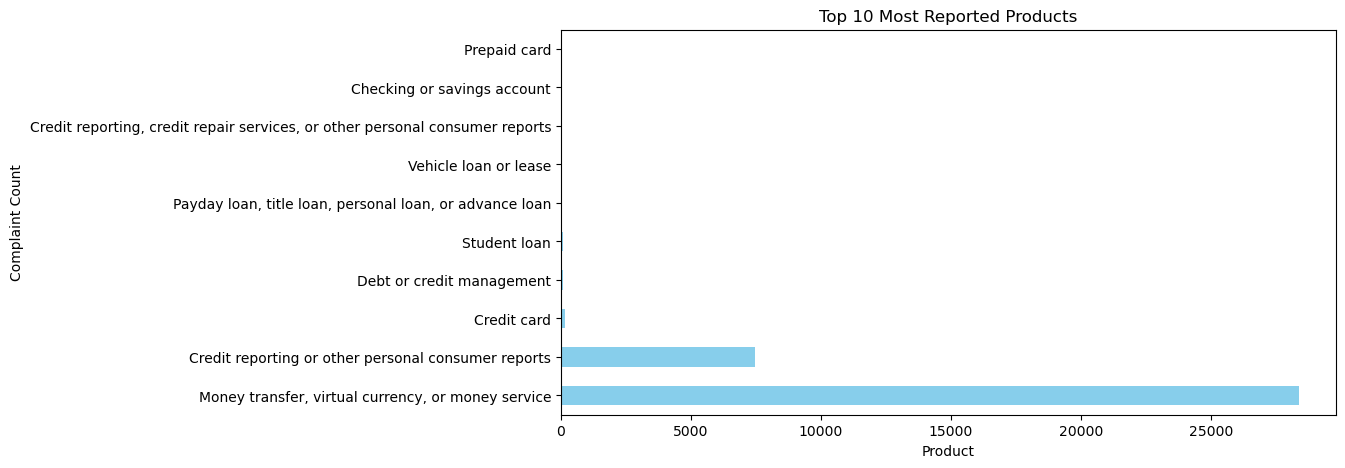

In [10]:
import matplotlib.pyplot as plt

# Plot top 10 products
df_copy["Product"].value_counts().head(10).plot(kind="barh", figsize=(10, 5), color="skyblue")
plt.title("Top 10 Most Reported Products")
plt.xlabel("Product")
plt.ylabel("Complaint Count")
plt.show()

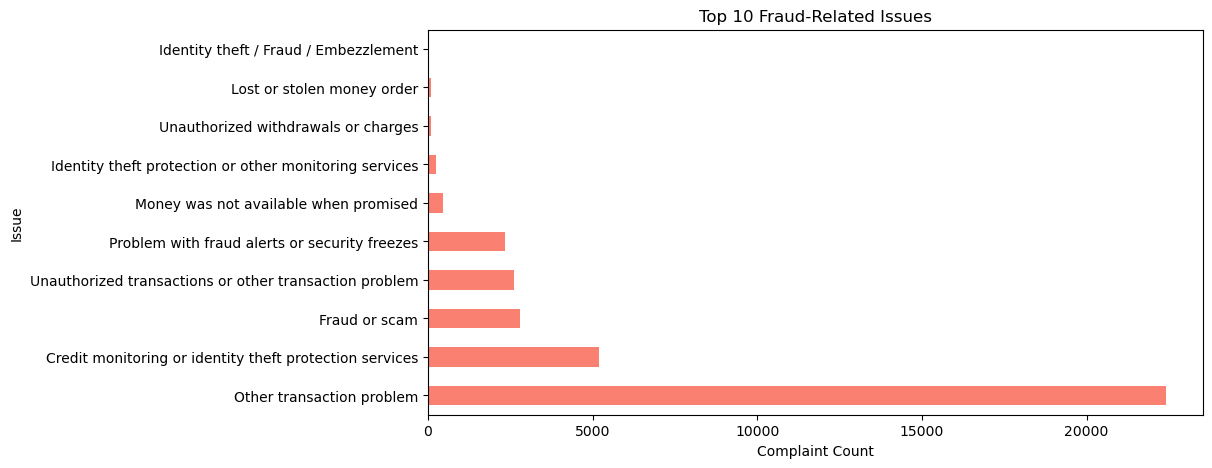

In [11]:
df_copy["Issue"].value_counts().head(10).plot(kind="barh", figsize=(10, 5), color="salmon")
plt.title("Top 10 Fraud-Related Issues")
plt.xlabel("Complaint Count")
plt.ylabel("Issue")
plt.show()

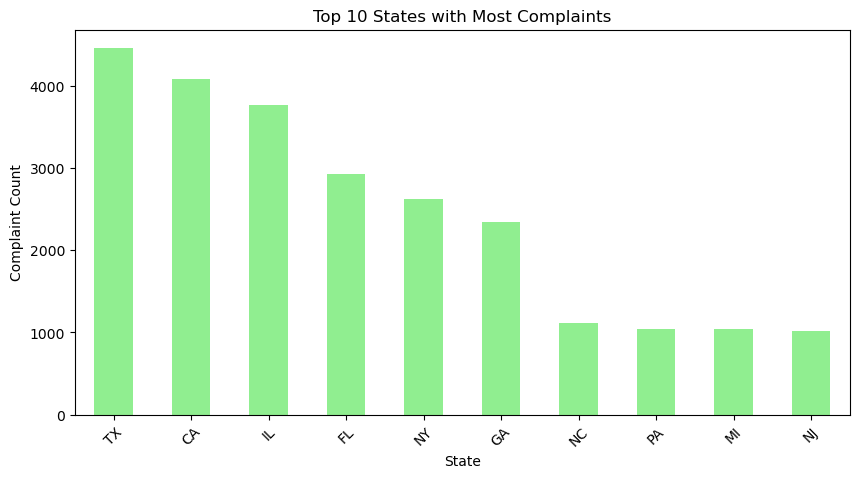

In [12]:
df_copy["State"].value_counts().head(10).plot(kind="bar", figsize=(10, 5), color="lightgreen")
plt.title("Top 10 States with Most Complaints")
plt.xlabel("State")
plt.ylabel("Complaint Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
print(df_copy["Date received"].head(10))

0    20-01-2025
1    09-03-2025
2    19-03-2025
3    20-01-2025
4    19-01-2025
5    19-03-2025
6    12-03-2025
7    08-02-2025
8    05-03-2025
9    20-01-2025
Name: Date received, dtype: object


In [14]:
# Analyzing complaints over time to check fraud trends

# Converting date received to Datetime
df_copy["Date received"] = pd.to_datetime(df_copy["Date received"], format="%d-%m-%Y", errors = "coerce")

print("Earliest Complaint Date:", df_copy["Date received"].min())
print("Latest Complaint Date:", df_copy["Date received"].max())

Earliest Complaint Date: 2011-12-30 00:00:00
Latest Complaint Date: 2025-03-20 00:00:00


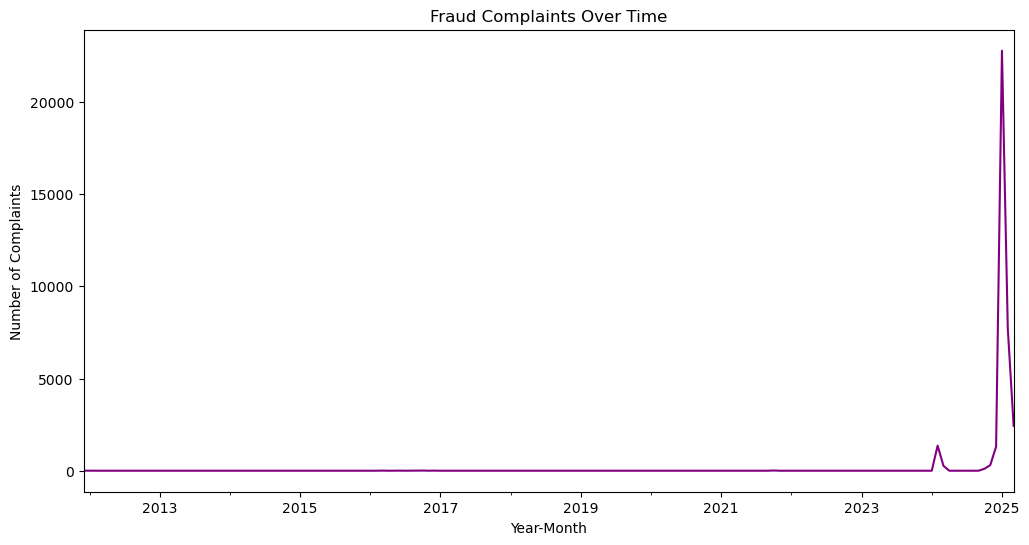

In [15]:
# Plotting complaints over time
df_copy.set_index("Date received")["Complaint ID"].resample("ME").count().plot(figsize = (12, 6), color = "purple")
plt.title("Fraud Complaints Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Complaints")
plt.show()

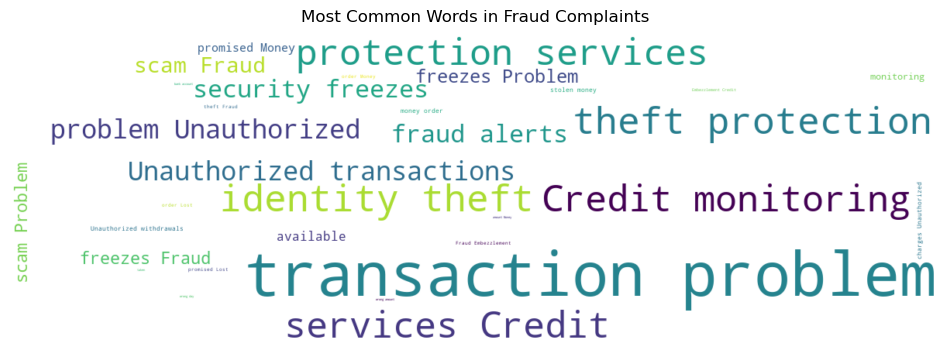

In [16]:
# Using Word Cloud for Most Common Fraud Terms
from wordcloud import WordCloud

# Combining all complaint issues into one large text
text = " ".join(df_copy["Issue"].dropna())

# Generating Word Cloud
wordcloud = WordCloud(width = 1200, height = 400, background_color = "white").generate(text)

# Plotting word cloud
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Most Common Words in Fraud Complaints")
plt.show()

In [17]:
# Using spaCy library - it's more efficient and optimized

import spacy

# Loading the English NLP model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

spaCy model loaded successfully!


In [18]:
# Processing a sample complaint text and splitting it into tokens (Tokenization)
text = "Identity was stole credit report fraud and I came out of pocket paying to get my credit fixed"

# Process the text with spaCy
doc = nlp(text)

# Extracting tokens
tokens = [token.text for token in doc]
print(tokens)

['Identity', 'was', 'stole', 'credit', 'report', 'fraud', 'and', 'I', 'came', 'out', 'of', 'pocket', 'paying', 'to', 'get', 'my', 'credit', 'fixed']


In [19]:
# Removing stopwords like "was", "and", "I", etc., which don’t add much meaning
tokens_no_stopwords = [token.text for token in doc if not token.is_stop]
print(tokens_no_stopwords)

['Identity', 'stole', 'credit', 'report', 'fraud', 'came', 'pocket', 'paying', 'credit', 'fixed']


In [20]:
# Lemmatization-> converting words to their root form
lemmas = [token.lemma_ for token in doc if not token.is_stop]
print(lemmas)

['identity', 'steal', 'credit', 'report', 'fraud', 'come', 'pocket', 'pay', 'credit', 'fix']


In [21]:
# Converting the complaints into a numerical format using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample complaints data
complaints = [
    "Identity was stole credit report fraud and I came out of pocket paying to get my credit fixed.",
    "I realized that my personal information wad exposed in several data breaches as well.",
    "My information was exposed in multiple data breach an I tried to speck with the companys about it, but no contact me back.",
    "I checked my credit report and found this accounts that I am not familiar."
]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words = "english")

# Fit and transform the complaints data
tfidf_matrix = vectorizer.fit_transform(complaints)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert to dense matrix formatfor better visualization
tfidf_dense = tfidf_matrix.toarray()

df_tfidf = pd.DataFrame(tfidf_dense, columns = feature_names)
print(df_tfidf)

   accounts   breach  breaches      came   checked  companys  contact  \
0  0.000000  0.00000  0.000000  0.314534  0.000000   0.00000  0.00000   
1  0.000000  0.00000  0.412928  0.000000  0.000000   0.00000  0.00000   
2  0.000000  0.35658  0.000000  0.000000  0.000000   0.35658  0.35658   
3  0.485461  0.00000  0.000000  0.000000  0.485461   0.00000  0.00000   

     credit      data   exposed  ...  multiple    paying  personal    pocket  \
0  0.495965  0.000000  0.000000  ...   0.00000  0.314534  0.000000  0.314534   
1  0.000000  0.325557  0.325557  ...   0.00000  0.000000  0.412928  0.000000   
2  0.000000  0.281132  0.281132  ...   0.35658  0.000000  0.000000  0.000000   
3  0.382743  0.000000  0.000000  ...   0.00000  0.000000  0.000000  0.000000   

   realized    report    speck     stole    tried       wad  
0  0.000000  0.247983  0.00000  0.314534  0.00000  0.000000  
1  0.412928  0.000000  0.00000  0.000000  0.00000  0.412928  
2  0.000000  0.000000  0.35658  0.000000  0.356

Observations:
- Word 'breach' has a high score of 0.35658 in complaint 3 means it's highly relevant 
- Word 'credit' has a higher score of 0.495965 in complaint 1 and 0.000000 in the other 2 complaints means it's more important in that complaint
- Words like "was", "in", "and", "I" etc are removed automatically due to `stop_words = "english"`

In [22]:
# Applying TF-IDF to full dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df_complaints = pd.read_csv("..\data\complaints_sample.csv", dtype=str, low_memory=False)

# Extracting the complaint text column
complaints = df_complaints["Consumer complaint narrative"].astype(str).tolist()

# Initializing TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words = "english", max_features = 1000)

# Fit and Transform the full complaints dataset
tfidf_matrix = vectorizer.fit_transform(complaints)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert to Dataframe
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = feature_names)

# Saving to csv for later use
df_tfidf.to_csv("..\data\idftf_features.csv", index = False)

print("TF-IDF feature extraction complete! Features saved as 'idftf_features.csv'")

TF-IDF feature extraction complete! Features saved as 'idftf_features.csv'


In [23]:
print(df_tfidf.head())

    00   10  100  1000   12   15  1681  1681b  1681c  200  ...  writing  \
0  0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...      0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...      0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...      0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...      0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...      0.0   

   written  wrong   xx  xxxx  xxxxxxxx  year  years  zelle  zelles  
0      0.0    0.0  0.0   0.0       0.0   0.0    0.0    0.0     0.0  
1      0.0    0.0  0.0   0.0       0.0   0.0    0.0    0.0     0.0  
2      0.0    0.0  0.0   0.0       0.0   0.0    0.0    0.0     0.0  
3      0.0    0.0  0.0   0.0       0.0   0.0    0.0    0.0     0.0  
4      0.0    0.0  0.0   0.0       0.0   0.0    0.0    0.0     0.0  

[5 rows x 1000 columns]


In [24]:
# Printing the first 50 words used as TF-IDF
print(vectorizer.get_feature_names_out()[:50])

['00' '10' '100' '1000' '12' '15' '1681' '1681b' '1681c' '200' '2000'
 '2023' '2024' '24' '30' '300' '50' '500' '605b' 'ability' 'able' 'access'
 'accessed' 'accidentally' 'accordance' 'according' 'account'
 'accountability' 'accountable' 'accounts' 'acct' 'accuracy' 'accurate'
 'act' 'action' 'actions' 'activities' 'activity' 'actual' 'actually'
 'add' 'added' 'additional' 'additionally' 'address' 'addressed'
 'addresses' 'adequate' 'adequately' 'advantage']


In [11]:
# Topic modeling with LDA
import pandas as pd
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Load complaint text data with explicit dtype
df_complaints = pd.read_csv("..\data\complaints_sample.csv", dtype=str, low_memory=False)

# Extract complaint text and drop NaN values
df_complaints = df_complaints.dropna(subset=["Consumer complaint narrative"])
complaint_texts = df_complaints["Consumer complaint narrative"].astype(str).tolist()

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\b(?:xxxx|xx|00|nan)\b", "", text)  # Remove masked personal info
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    return text.strip()

# Apply text cleaning
cleaned_texts = [clean_text(text) for text in complaint_texts]

# Custom stopwords (financial terms that don’t add meaning)
custom_stopwords = {
    "zelle", "cfpb", "bank", "account", "loan", "credit", "payment", "report",
    "the", "to", "and", "my", "on", "it", "for", "have", "from", "that", "of", "was", "this", "be"
}

# Fit TF-IDF Vectorizer with custom stopwords
vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords) + ["english"], max_features=1000, token_pattern=r"(?u)\b\w\w+\b")
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)

# Get correct feature names
feature_names = vectorizer.get_feature_names_out()

# Define number of topics
NUM_TOPICS = 5

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Function to print topics
def print_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1 : -1]]
        print(f"**Topic {topic_idx + 1}:** {', '.join(top_words)}\n")

print("\n**Identified Topics in Complaints:**\n")
print_topics(lda_model, feature_names)  # No more IndexError!

# Assigning each complaint to a topic
df_topics = pd.DataFrame(lda_matrix, columns=[f"Topic_{i + 1}" for i in range(NUM_TOPICS)])
df_topics["Dominant_Topic"] = df_topics.idxmax(axis=1)

# Saving topic distribution
df_topics.to_csv("..\data\complaint_topics.csv", index=False)

print("LDA Topic Modeling Complete! Topics saved in 'complaint_topics.csv'")


**Identified Topics in Complaints:**

**Topic 1:** act, unfair, resolution, cash, app, their, under, caused, measures, practices

**Topic 2:** especially, its, zelles, multiple, customers, has, possible, properly, concern, highlights

**Topic 3:** platformdespite, adequatelythey, recovery, highlight, several, accountable, laws, where, form, privacy

**Topic 4:** concerns, has, consumers, highlighting, numerous, adequately, neglected, indicate, particularly, discrepancies

**Topic 5:** money, sent, they, or, had, no, information, been, never, them

LDA Topic Modeling Complete! Topics saved in 'complaint_topics.csv'


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

In [13]:
# Load filtered complaints dataset
df_complaints = pd.read_csv("../data/complaints_sample.csv", dtype=str, low_memory=False)

# Keep only the necessary column
df_complaints = df_complaints[["Consumer complaint narrative"]].dropna()
df_complaints.rename(columns={"Consumer complaint narrative": "complaint_text"}, inplace=True)

# Convert to string
df_complaints["complaint_text"] = df_complaints["complaint_text"].astype(str)

# Display sample
df_complaints.head()

,complaint_text
0,I just applied for a credit card and was shock...
14,I recently reviewed a copy of my credit report...
39,have reached out multiple times about Account ...
44,This issue is regarding the company CREDIT ACC...
45,"For Discover Acct # XXXX Identity, thieves hav..."


In [14]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores["compound"] >= 0.05:
        return "Positive"
    elif scores["compound"] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df_complaints["Sentiment"] = df_complaints["complaint_text"].apply(get_sentiment)

# Save results
df_complaints.to_csv("../data/complaints_with_sentiment.csv", index=False)

print("Sentiment Analysis Complete! Results saved in 'complaints_with_sentiment.csv'.")

Sentiment Analysis Complete! Results saved in 'complaints_with_sentiment.csv'.


In [15]:
# Count of sentiment categories
sentiment_counts = df_complaints["Sentiment"].value_counts()
print(sentiment_counts)

Sentiment
Negative    11280
Positive     1447
Neutral       285
Name: count, dtype: int64
